In [64]:
import pandas as pd
import numpy as np
# models
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB  

# data helpers
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Source: https://www.kaggle.com/sakshigoyal7/credit-card-customers
# Read in data
data = pd.read_csv("bankchurners.csv")

In [34]:
# Summary stats
data.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [35]:
# check for NaNs
data.isnull().values.any()

False

In [36]:
# check for duplicates
data.duplicated().sum()

0

In [37]:
# delete last two columns we don't need
del data["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]
del data["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

In [38]:
data.groupby("Attrition_Flag").count()

CLIENTNUM  Customer_Age  Gender  Dependent_count  \
Attrition_Flag                                                        
Attrited Customer       1627          1627    1627             1627   
Existing Customer       8500          8500    8500             8500   

                   Education_Level  Marital_Status  Income_Category  \
Attrition_Flag                                                        
Attrited Customer             1627            1627             1627   
Existing Customer             8500            8500             8500   

                   Card_Category  Months_on_book  Total_Relationship_Count  \
Attrition_Flag                                                               
Attrited Customer           1627            1627                      1627   
Existing Customer           8500            8500                      8500   

                   Months_Inactive_12_mon  Contacts_Count_12_mon  \
Attrition_Flag                                                     
Attrited Customer                    1627                   1627   
Existing Customer                    8500                   8500   

                   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
Attrition_Flag                                                          
Attrited Customer          1627                 1627             1627   
Existing Customer          8500                 8500             8500   

                   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
Attrition_Flag                                                             
Attrited Customer                  1627             1627            1627   
Existing Customer                  8500             8500            8500   

                   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                 
Attrited Customer                 1627                   1627  
Existing Customer                 8500                   8500

In [39]:
data[data["Attrition_Flag"] == 'Attrited Customer'].count().iloc[0]

1627

In [40]:
cols = ["Attrition_Flag", "Customer_Age", "Gender", "Dependent_count", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Months_on_book", "Credit_Limit", "Avg_Utilization_Ratio"]
interesting_data = data[cols]
interesting_data

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Credit_Limit  Avg_Utilization_Ratio  
0                  39       12691.0                  0.061  
1                  44        8256.0                  0.105  
2                  36        3418.0                  0.000  
3                  34        3313.0                  0.760  
4                  21        4716.0                  0.000  
...               ...           ...                    ...  
10122              40        4003.0                  0.462  
10123              25        4277.0                  0.511  
10124              36        5409.0                  0.000  
10125              36        5281.0                  0.000  
10126              25       10388.0                  0.189  

[10127 rows x 11 columns]

In [41]:
interesting_data.describe()

Customer_Age  Dependent_count  Months_on_book  Credit_Limit  \
count  10127.000000     10127.000000    10127.000000  10127.000000   
mean      46.325960         2.346203       35.928409   8631.953698   
std        8.016814         1.298908        7.986416   9088.776650   
min       26.000000         0.000000       13.000000   1438.300000   
25%       41.000000         1.000000       31.000000   2555.000000   
50%       46.000000         2.000000       36.000000   4549.000000   
75%       52.000000         3.000000       40.000000  11067.500000   
max       73.000000         5.000000       56.000000  34516.000000   

       Avg_Utilization_Ratio  
count           10127.000000  
mean                0.274894  
std                 0.275691  
min                 0.000000  
25%                 0.023000  
50%                 0.176000  
75%                 0.503000  
max                 0.999000

In [47]:
left = data[data["Attrition_Flag"] == 'Attrited Customer']
left

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
21     708508758  Attrited Customer            62      F                0   
39     708300483  Attrited Customer            66      F                0   
51     779471883  Attrited Customer            54      F                1   
54     714374133  Attrited Customer            56      M                2   
61     712030833  Attrited Customer            48      M                2   
...          ...                ...           ...    ...              ...   
10119  716893683  Attrited Customer            55      F                3   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
21           Graduate        Married  Less than $40K          Blue   
39          Doctorate        Married         Unknown          Blue   
51           Graduate        Married  Less than $40K          Blue   
54           Graduate        Married         $120K +          Blue   
61           Graduate        Married     $60K - $80K        Silver   
...               ...            ...             ...           ...   
10119      Uneducated         Single         Unknown          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
21                 49  ...                       3                      3   
39                 56  ...                       4                      3   
51                 40  ...                       3                      1   
54                 36  ...                       3                      3   
61                 35  ...                       4                      4   
...               ...  ...                     ...                    ...   
10119              47  ...                       3                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
21           1438.3                    0           1438.3   
39           7882.0                  605           7277.0   
51           1438.3                  808            630.3   
54          15769.0                    0          15769.0   
61          34516.0                    0          34516.0   
...             ...                  ...              ...   
10119       14657.0                 2517          12140.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
21                    1.047              692              16   
39                    1.052              704              16   
51                    0.997              705              19   
54                    1.041              602              15   
61                    0.763              691              15   
...                     ...              ...             ...   
10119                 0.166             6009              53   
10123                 0.804             8764              69   
10124  

Text(12.99212673611111, 0.5, 'Credit Limit')

<Figure size 1440x1440 with 0 Axes>

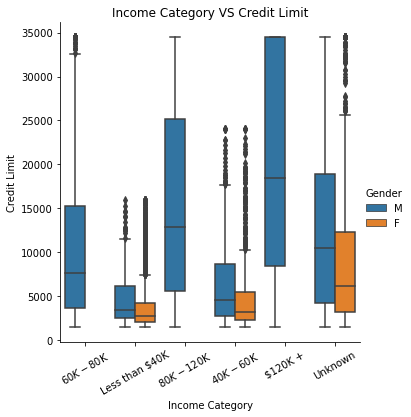

In [48]:
plt.figure(figsize=(20,20))
sns.catplot(x="Income_Category", y="Credit_Limit", hue="Gender", kind="box", data=interesting_data)
plt.xticks(rotation=30)
plt.title("Income Category VS Credit Limit")
plt.xlabel("Income Category")
plt.ylabel("Credit Limit")

<Figure size 720x720 with 0 Axes>

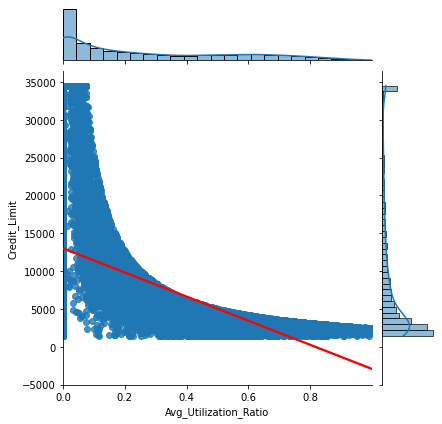

In [49]:
plt.figure(figsize=(10,10))
g = sns.jointplot(x="Avg_Utilization_Ratio", y="Credit_Limit", data=interesting_data, kind='reg', truncate=True)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

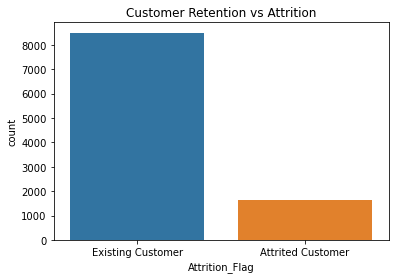

In [50]:
sns.countplot(x = 'Attrition_Flag',
              data = data)
plt.title("Customer Retention vs Attrition")
plt.show()

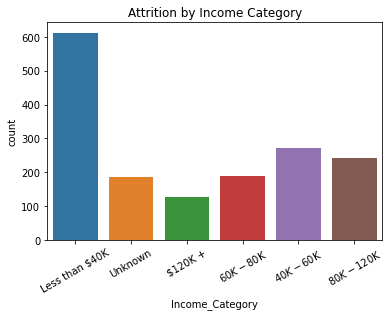

In [51]:
sns.countplot(x = 'Income_Category',
              data = left)
plt.xticks(rotation=30)
plt.title("Attrition by Income Category")
plt.show()

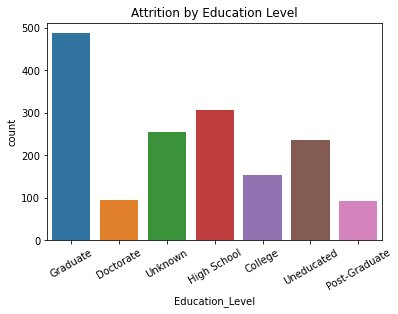

In [52]:
sns.countplot(x = 'Education_Level',
              data = left)
plt.xticks(rotation=30)
plt.title("Attrition by Education Level")
plt.show()

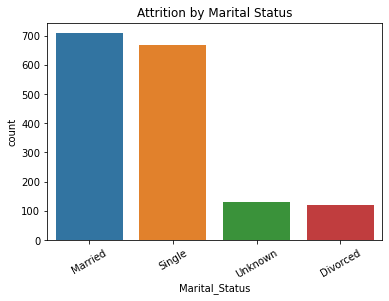

In [53]:
sns.countplot(x = 'Marital_Status',
              data = left)
plt.xticks(rotation=30)
plt.title("Attrition by Marital Status")
plt.show()

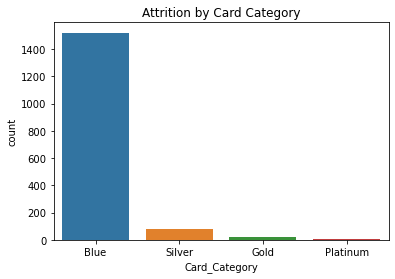

In [54]:
sns.countplot(x = 'Card_Category',
              data = left)
plt.title("Attrition by Card Category")
plt.show()

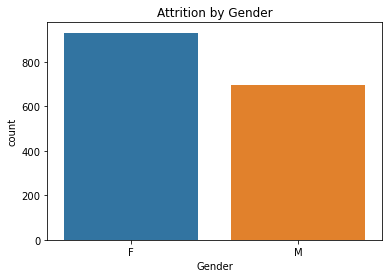

In [55]:
sns.countplot(x = 'Gender',
              data = left)
plt.title("Attrition by Gender")
plt.show()

Text(12.99212673611111, 0.5, 'Credit Limit')

<Figure size 1440x1440 with 0 Axes>

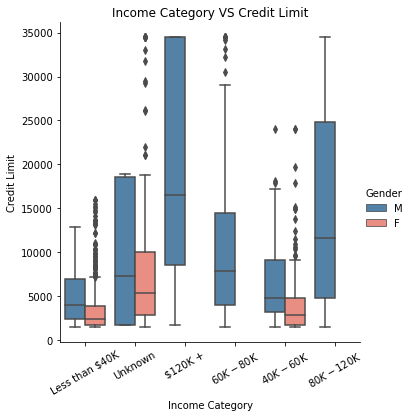

In [56]:
plt.figure(figsize=(20,20))
sns.catplot(x="Income_Category", y="Credit_Limit", hue="Gender", kind="box", data=left, palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"]), hue_order = ["M", "F"])
plt.xticks(rotation=30)
plt.title("Income Category VS Credit Limit")
plt.xlabel("Income Category")
plt.ylabel("Credit Limit")

<Figure size 720x720 with 0 Axes>

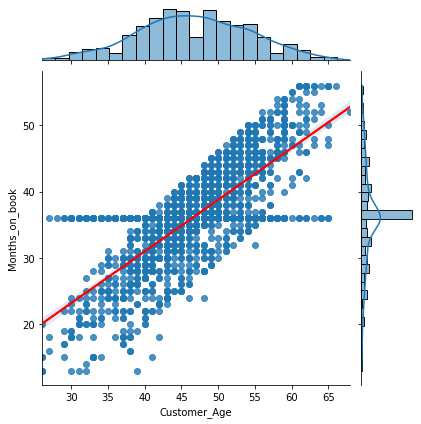

In [76]:
plt.figure(figsize=(10,10))
g = sns.jointplot(x="Customer_Age", y="Months_on_book", data=left, kind='reg', truncate=True)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

<Figure size 720x720 with 0 Axes>

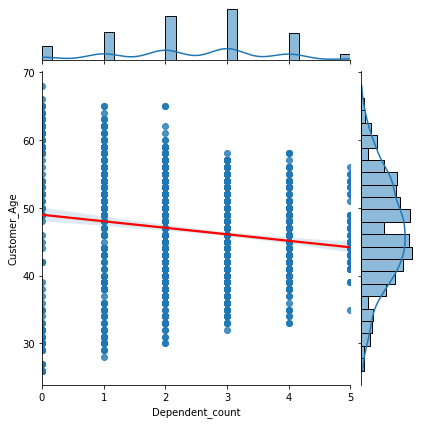

In [77]:
plt.figure(figsize=(10,10))
g = sns.jointplot(x="Dependent_count", y="Customer_Age", data=left, kind='reg', truncate=True)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

<Figure size 720x720 with 0 Axes>

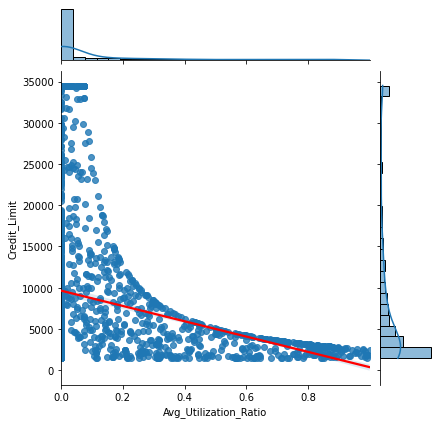

In [78]:
plt.figure(figsize=(10,10))
g = sns.jointplot(x="Avg_Utilization_Ratio", y="Credit_Limit", data=left, kind='reg', truncate=True)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

In [58]:
# 21 columns and 10127 rows
left.shape

(1627, 21)

In [59]:
# 10127 rows of data
len(left)

1627

In [60]:
# looking at columns by their datatypes
left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 21 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 1627 non-null   int64  
 1   Attrition_Flag            1627 non-null   object 
 2   Customer_Age              1627 non-null   int64  
 3   Gender                    1627 non-null   object 
 4   Dependent_count           1627 non-null   int64  
 5   Education_Level           1627 non-null   object 
 6   Marital_Status            1627 non-null   object 
 7   Income_Category           1627 non-null   object 
 8   Card_Category             1627 non-null   object 
 9   Months_on_book            1627 non-null   int64  
 10  Total_Relationship_Count  1627 non-null   int64  
 11  Months_Inactive_12_mon    1627 non-null   int64  
 12  Contacts_Count_12_mon     1627 non-null   int64  
 13  Credit_Limit              1627 non-null   float64
 14  Total_

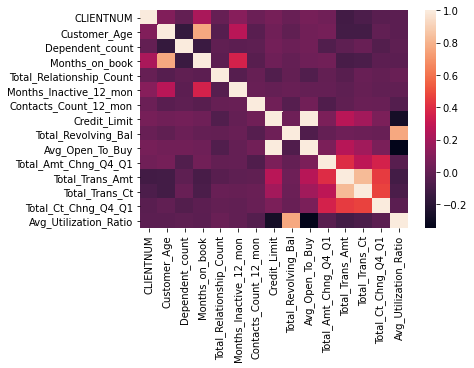

In [61]:
# looking for correlations
sns.heatmap(left.corr())
plt.show()

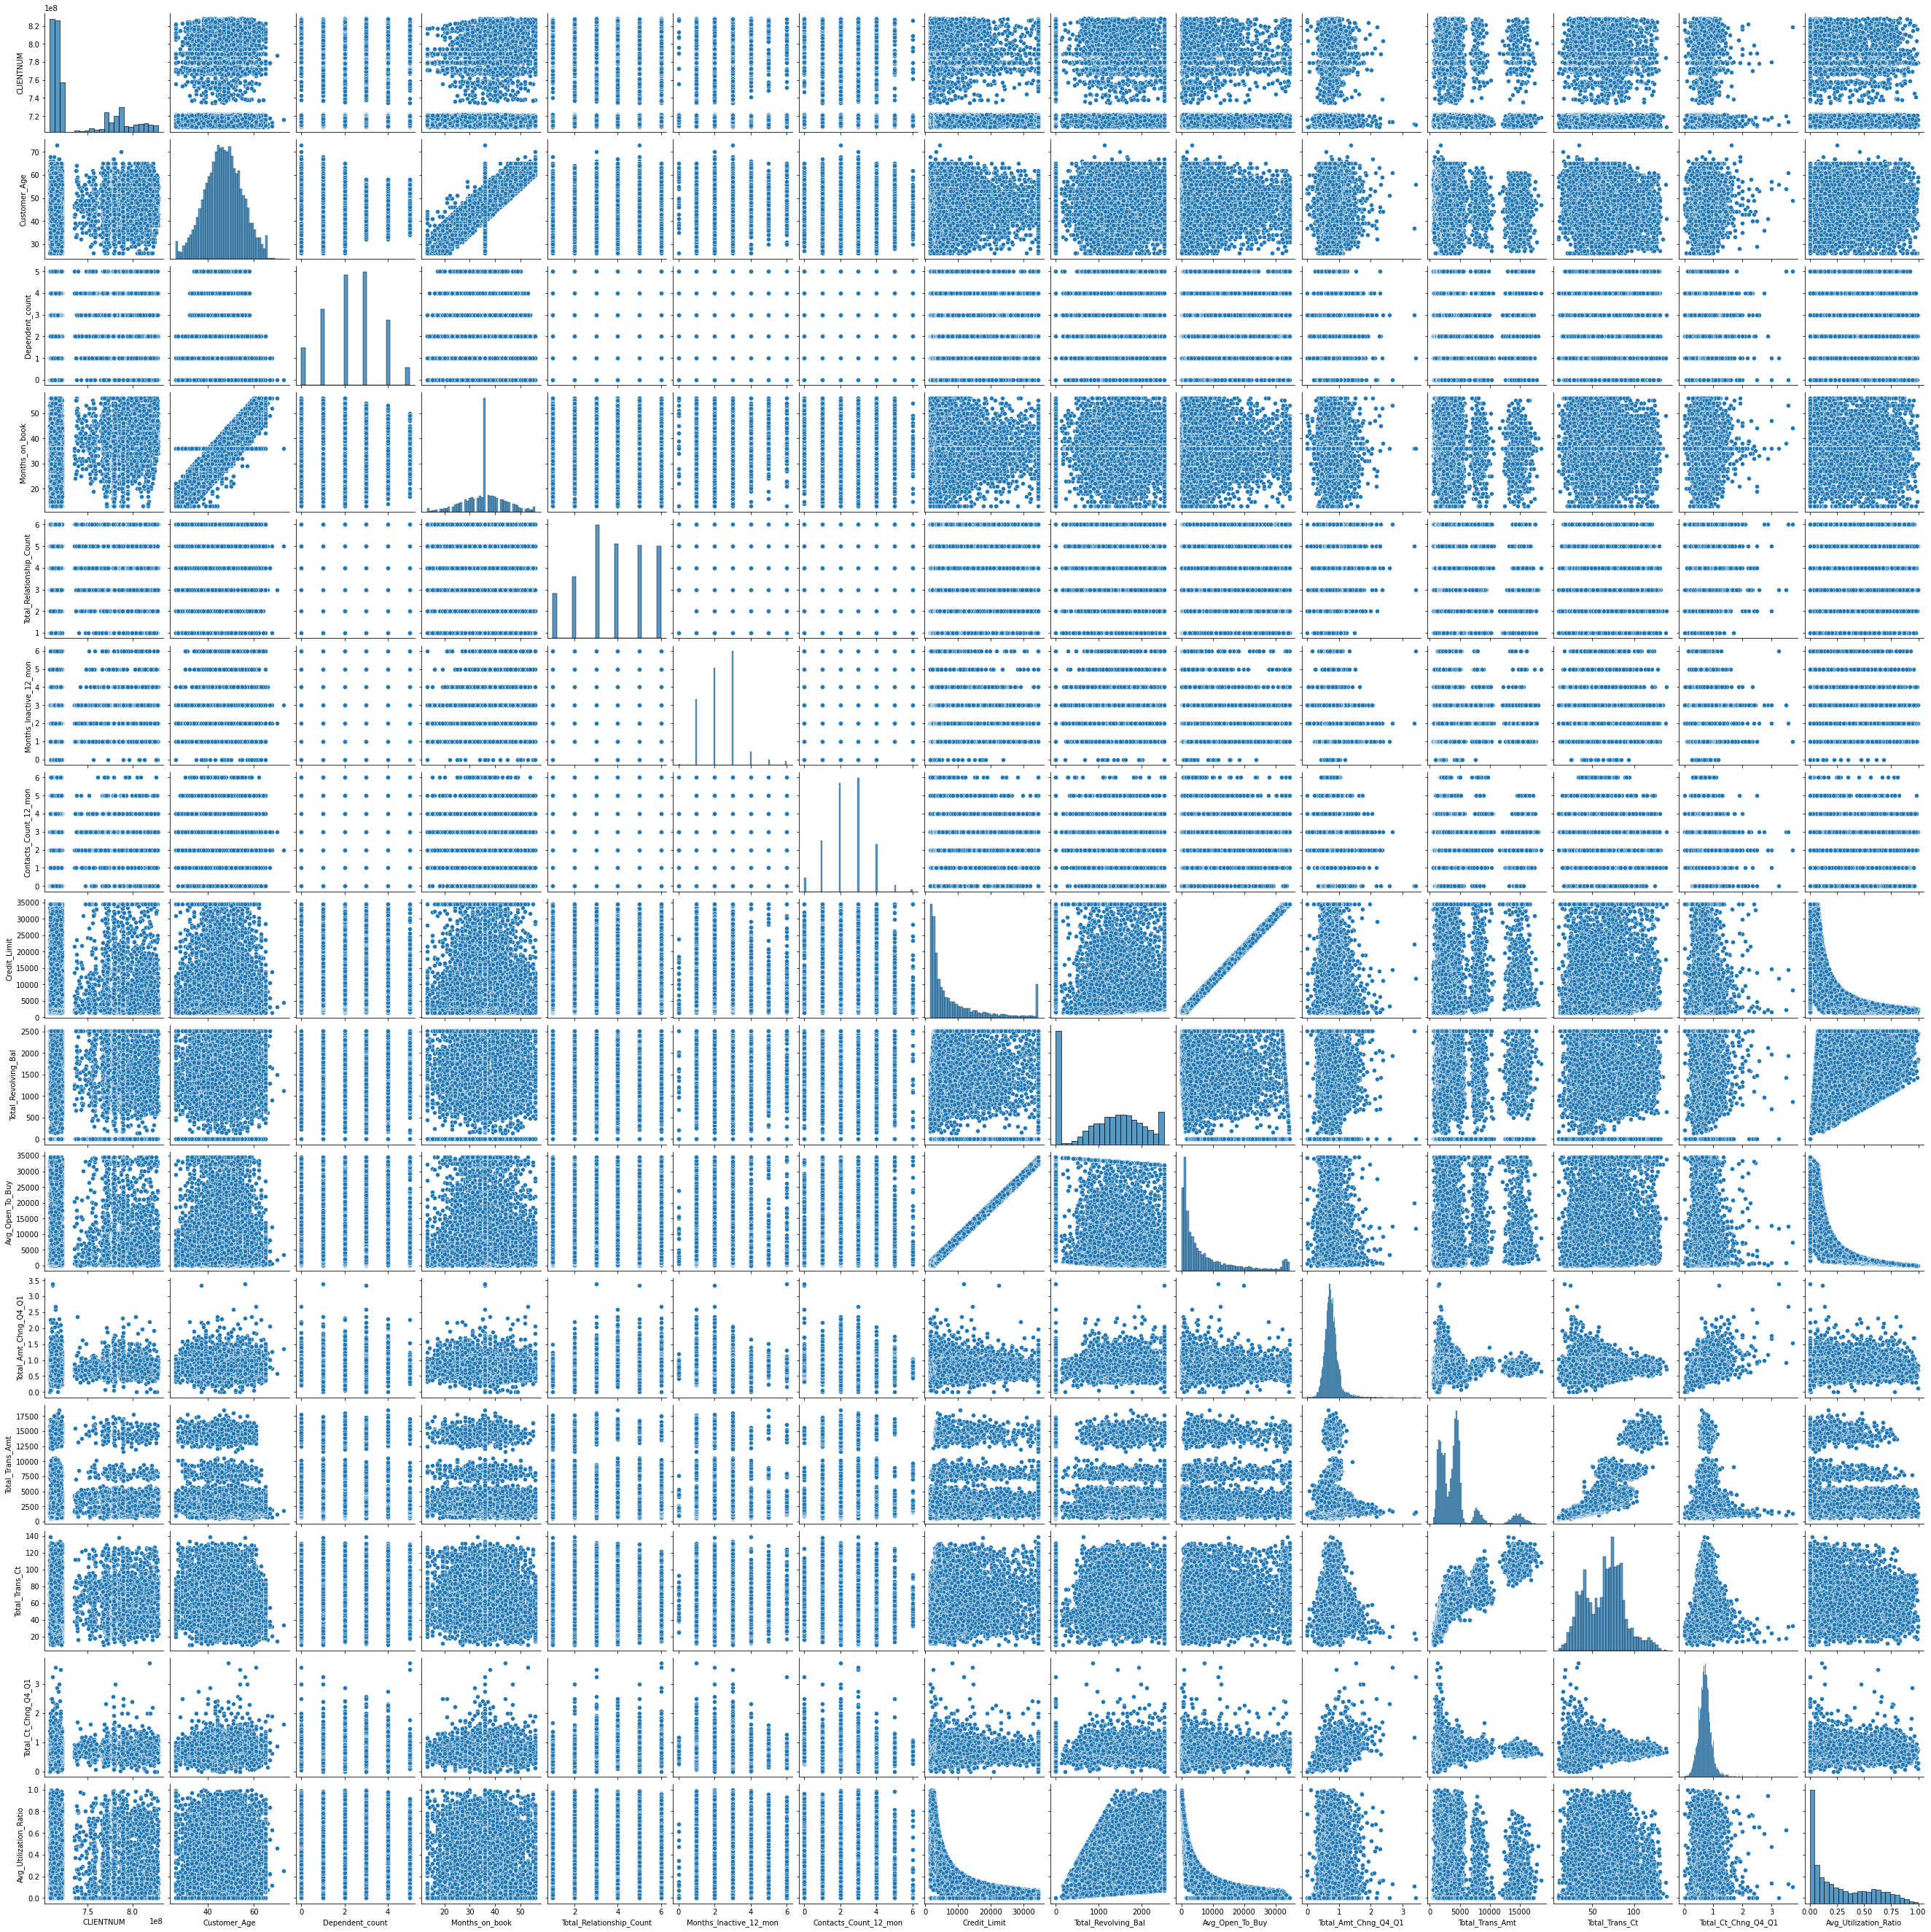

In [13]:
# looking for correlations
sns.pairplot(data)
plt.show()

In [65]:
# classifier object
classifier = GaussianNB()

In [66]:
data.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [79]:
# Of data, 80% used for training and 20% for testing model
split = int(len(interesting_data) * .80)
print(split, len(interesting_data))
train_data = interesting_data.iloc[:split]
test_data = interesting_data.iloc[split:]

8101 10127


In [70]:
# features using number columns
features = ["Customer_Age", "Dependent_count", "Months_on_book", "Credit_Limit", "Avg_Utilization_Ratio"] 

In [71]:
print(interesting_data.columns)
print(features)

classifier.fit(train_data[features], train_data.Attrition_Flag)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Credit_Limit', 'Avg_Utilization_Ratio'],
      dtype='object')
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit', 'Avg_Utilization_Ratio']


GaussianNB()

In [72]:
preds = classifier.predict(test_data[features])
print(preds)

['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Existing Customer' 'Existing Customer' 'Existing Customer']


In [73]:
right = 0
wrong = 0
diff = 0
for idx, i in enumerate(preds):
    #idx is the index and i is the predicted seed
    if i == test_data.Attrition_Flag.iloc[idx]:
        if i == "Existing Customer":
            print('Correct! Customer #' + str(test_data.index[idx]), i, ': Customer Retention Sucessfully Predicted')
            right += 1
        else:
            print('Correct! Customer #' + str(test_data.index[idx]), i, ': Customer Churn Sucessfully Predicted')
            right += 1


    else:
        print('Missed: Predicted', i, '- truth:', test_data.Attrition_Flag.iloc[idx])
        wrong += 1

print('In total we got {} right and {} wrong.'.format(right, wrong)) 
perc = (right / (right+wrong)) * 100
print(round(perc, 2) , "% accuracy!")

Correct! Customer #8101 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8102 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8103 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8104 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8105 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8106 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8107 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8108 Existing Customer : Customer Retention Sucessfully Predicted
Missed: Predicted Existing Customer - truth: Attrited Customer
Missed: Predicted Existing Customer - truth: Attrited Customer
Correct! Customer #8111 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8112 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8113 

Correct! Customer #8717 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8718 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8719 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8720 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8721 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8722 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8723 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8724 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8725 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8726 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8727 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #8728 Existing Customer : Customer Retention Su

Correct! Customer #9338 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9339 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9340 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9341 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9342 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9343 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9344 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9345 Existing Customer : Customer Retention Sucessfully Predicted
Missed: Predicted Existing Customer - truth: Attrited Customer
Correct! Customer #9347 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9348 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9349 Existing Customer : Customer Retention Sucessfully Predicted
Co

Correct! Customer #9955 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9956 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9957 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9958 Existing Customer : Customer Retention Sucessfully Predicted
Missed: Predicted Existing Customer - truth: Attrited Customer
Correct! Customer #9960 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9961 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9962 Existing Customer : Customer Retention Sucessfully Predicted
Missed: Predicted Existing Customer - truth: Attrited Customer
Correct! Customer #9964 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9965 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9966 Existing Customer : Customer Retention Sucessfully Predicted
Correct! Customer #9967 

In [183]:
from sklearn.cluster import KMeans

In [277]:
model_data = data.groupby("CLIENTNUM").mean()
x = model_data.to_numpy()

In [278]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(3,13):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(model_data)
    wcss.append(kmeans.inertia_)

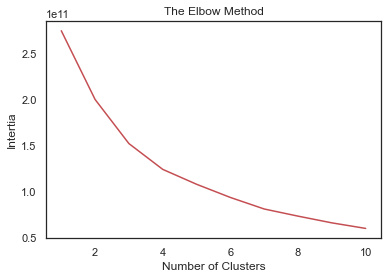

In [279]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss, color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()

In [280]:
k_means = KMeans(n_clusters=5, init="random", n_init=1, max_iter=5, random_state=42)

In [281]:
y_kmeans = k_means.fit_predict(model_data)

In [282]:
model_data['y_kmeans'] = y_kmeans

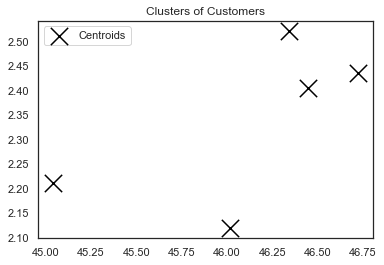

In [290]:
#Visualizing all the clusters 

#plt.scatter(model_data[y_kmeans == 0, 0], model_data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
#plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
#plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'black', marker='x', label = 'Centroids')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

In [242]:
cluster_results = model_data.groupby('y_kmeans').mean()

In [243]:
cluster_results

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
y_kmeans                                                                
0         7.152442e+08     46.524979         2.317500       35.881762   
1         7.550274e+08     46.145656         2.345419       36.397810   
2         7.105846e+08     45.850129         2.396398       34.809019   
3         7.948485e+08     46.668610         2.360010       37.346519   
4         7.215093e+08     46.408045         2.306400       35.072856   

          Total_Relationship_Count  Months_Inactive_12_mon  \
y_kmeans                                                     
0                         3.853312                2.332416   
1                         3.859851                2.316253   
2                         3.707619                2.327473   
3                         3.773844                2.356517   
4                         3.809015                2.348495   

          Contacts_Count_12_mon  Total_Revolving_Bal  Avg_Open_To_Buy  \
y_kmeans                                                                
0                      2.468597          1182.652669      7875.135306   
1                      2.453491          1219.923280      4749.356592   
2                      2.427873          1204.078130      9367.204031   
3                      2.493407          1170.488707      9632.372574   
4                      2.474107          1189.821190      8549.848019   

          Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
y_kmeans                                                          
0                     0.761104      4466.376456       64.456234   
1                     0.762139      4219.485331       64.772994   
2                     0.758367      4601.481704       64.090795   
3                     0.762914      4444.713961       64.809337   
4                     0.759246      4640.842376       65.088872   

          Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
y_kmeans                                              
0                    0.713414               0.235066  
1                    0.711375               0.336286  
2                    0.706292               0.204219  
3                    0.716480               0.196070  
4                    0.717022               0.225824

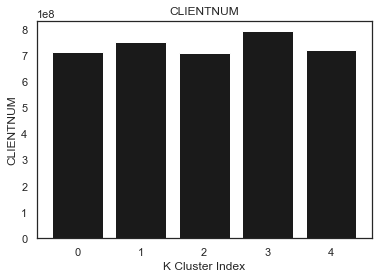

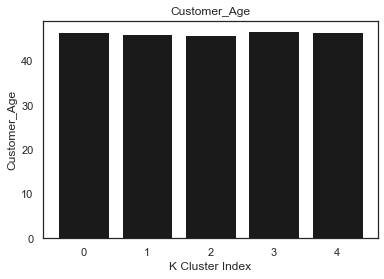

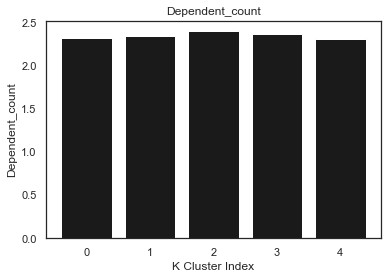

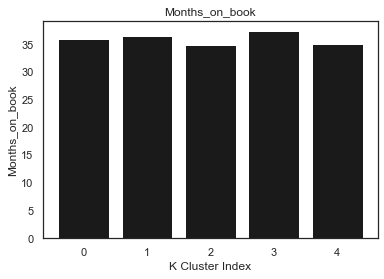

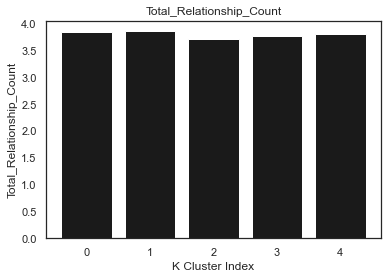

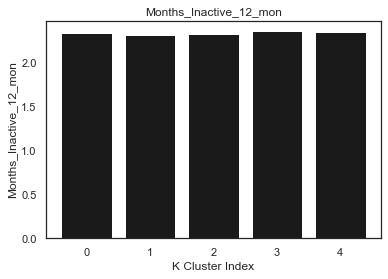

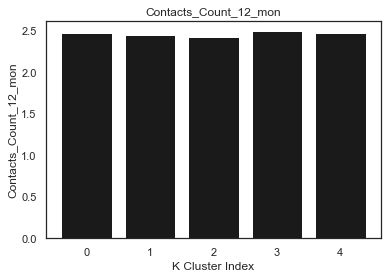

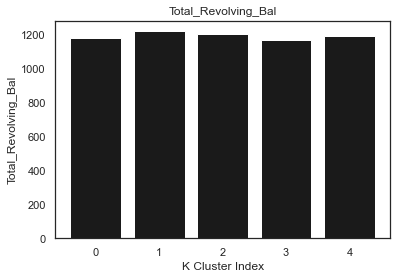

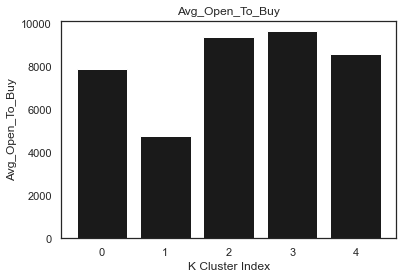

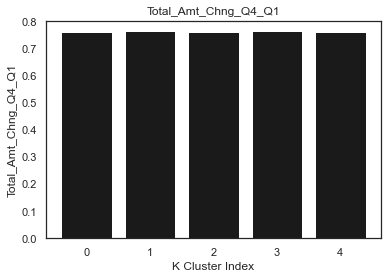

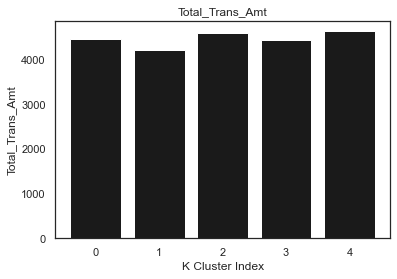

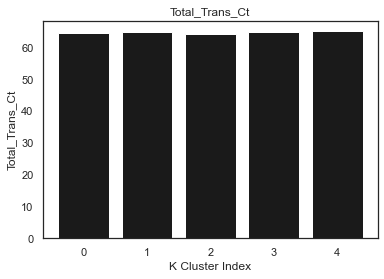

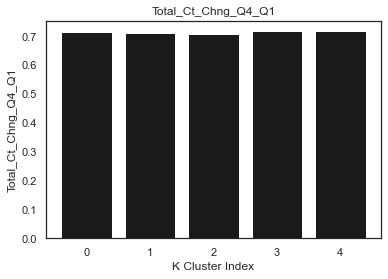

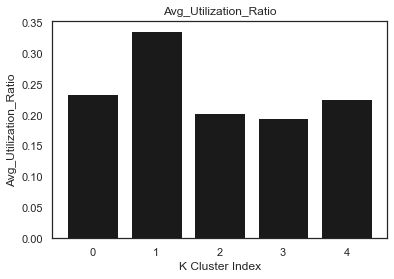

In [244]:
for col in cluster_results.columns:
    plt.bar(cluster_results.index,cluster_results[col], color='k')
    plt.title(col)
    plt.xlabel('K Cluster Index')
    plt.ylabel(col)
    plt.show()

In [256]:
cluster_results.index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='y_kmeans')